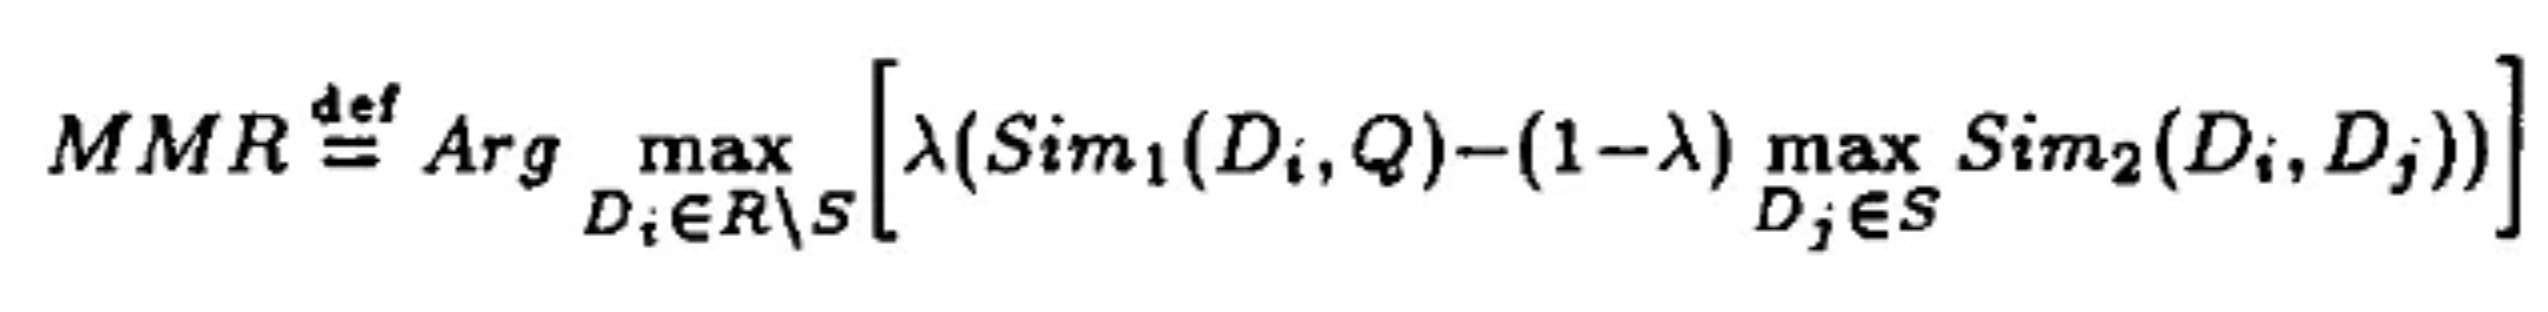

```
where, Q = Query (Description of Document category)
 D = Set of documents related to Query Q 
 S = Subset of documents in R already selected 
 R\S = set of unselected documents in R 
 λ = Constant in range [0–1], for diversification of results
 ```

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def maximal_marginal_relevance(
    sentence_vector,
    phrases,
    embedding_matrix,
    lambda_constant=0.5,
    threshold_terms=10
):
    """
    Return ranked phrases using MMR. Cosine similarity is used as similarity measure.
    :param sentence_vector: Query vector
    :param phrases: list of candidate phrases
    :param embedding_matrix: matrix having index as phrases and values as vector
    :param lambda_constant: 0.5 to balance diversity and accuracy. if lambda_constant is high, then higher accuracy. If lambda_constant is low then high diversity.
    :param threshold_terms: number of terms to include in result set
    :return: Ranked phrases with score
    """
    # todo: Use cosine similarity matrix for lookup among phrases instead of making call everytime.
    s = []
    r = sorted(phrases, key=lambda x: x[1], reverse=True)
    r = [i[0] for i in r]
    while len(r) > 0:
        score = 0
        phrase_to_add = ''
        for i in r:
            first_part = cosine_similarity([sentence_vector], [embedding_matrix.loc[i]])[0][0]
            second_part = 0
            for j in s:
                cos_sim = cosine_similarity([embedding_matrix.loc[i]], [embedding_matrix.loc[j[0]]])[0][0]
                if cos_sim > second_part:
                    second_part = cos_sim
            equation_score = lambda_constant*(first_part)-(1-lambda_constant) * second_part
            if equation_score > score:
                score = equation_score
                phrase_to_add = i
        if phrase_to_add == '':
            phrase_to_add = i
        r.remove(phrase_to_add)
        s.append((phrase_to_add, score))
    return (s, s[:threshold_terms])[threshold_terms > len(s)]